In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\20208463\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20208463\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [3]:
consumer_key = 'YNyiyE5ibJ86TbhBDoFCpEsBu'
consumer_secret = 'cE63ZCAiiNBYogYUNwjwGgB2jOVBxvZkkPOfwm7SPMa6Eocb6V'
access_token = '748789075-E190Pda4cc7GQr4KQyUczGy9QtoMMPiSEkEm5uKP'
access_token_secret = 'aAlExkHR84ij1SQpw3wZpsBg1WCNxYv5yUWchyDHya8YN'

In [4]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
cursor = tw.Cursor(api.user_timeline, id = 'KTRTRS', tweet_mode = "extended").items(1000)

In [6]:
tweets = [{'Tweet':tweet.full_text} for tweet in cursor]
print(tweets)

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


[{'Tweet': 'RT @IndiaembFrance: @KTRTRS-IT&amp;Industries Minister,Govt of Telangana,@HenriVerdier-🇫🇷 Amb Digital Affairs @AmbNum &amp; EoI,Paris came together…'}, {'Tweet': 'RT @MinisterKTR: .@byMBDA is the world leader in missiles and missile systems with its headquarters in Paris.\n\nMinister @KTRTRS invited the…'}, {'Tweet': "RT @MinisterKTR: IT &amp; Industries Minister @KTRTRS held a formal meeting with @byMBDA's top management team comprising of Directors Boris So…"}, {'Tweet': 'RT @MinisterKTR: The Telangana Delegation headed by Minister @KTRTRS met with Aerocampus Aquitaine Sales Director Xavier Audion in Paris to…'}, {'Tweet': 'RT @MinisterKTR: ఫ్రాన్స్\u200c పర్యటనలో భాగంగా మంత్రి @KTRTRS తొలి రోజు ఆ దేశ డిజిటల్\u200c అఫైర్స్\u200c అంబాసిడర్\u200c హెన్రీ వర్డియర్\u200cతో సమావేశం అయ్యారు.…'}, {'Tweet': 'RT @anarchist_vs: ఉల్టా చోర్ కొత్వాల్ కో డాంటే!\nఈ సామెత వీళ్ల కోసమే పుట్టినట్టుంది!\nవడ్లు కొనం అని కరాఖండిగా\nచెప్పింది కేంద్రమే!\n\nకొనాల్సిం…'}, {'Tweet': 'RT @MinisterKTR

In [7]:
df_tweet = pd.DataFrame.from_dict(tweets)
df_tweet.head()

,Tweet
0,RT @IndiaembFrance: @KTRTRS-IT&amp;Industries ...
1,RT @MinisterKTR: .@byMBDA is the world leader ...
2,RT @MinisterKTR: IT &amp; Industries Minister ...
3,RT @MinisterKTR: The Telangana Delegation head...
4,RT @MinisterKTR: ఫ్రాన్స్‌ పర్యటనలో భాగంగా మంత...


In [8]:

# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob



In [9]:
stop_words = stopwords.words('english')
custom_stopwords = ['RT','aoc','amp']

In [10]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df_tweet.head()

,Tweet
0,@IndiaembFrance: @KTRTRS-IT&amp;Industries Min...
1,@MinisterKTR: .@byMBDA world leader missile mi...
2,@MinisterKTR: IT &amp; Industries Minister @KT...
3,@MinisterKTR: The Telangana Delegation headed ...
4,@MinisterKTR: ఫ్రాన్స్‌ పర్యటనలో భాగంగా మంత్రి...


In [11]:
df1 = df_tweet.to_string()

df_split = df1.split()

df_split

all_sentences = []

for word in df_split:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

In [12]:
#print(lines)

In [13]:
import re

In [14]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        word = word.lower()
        lines2.append(word)
            

In [15]:
# #This is stemming the words to their root
# from nltk.stem.snowball import SnowballStemmer

# # The Snowball Stemmer requires that you pass a language parameter
# s_stemmer = SnowballStemmer(language='english')

# stem = []
# for word in lines2:
#     stem.append(s_stemmer.stem(word))
    
# #stem

In [16]:
#Removing all Stop Words

stem2 = []

stem = lines2 # Remove this if you want stemming

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

#stem2

In [17]:
df_count = pd.DataFrame(stem2)

df_count = df_count[0].value_counts()

In [18]:
df_count.head()

thanks         208
ministerktr    169
ktroffice      111
ktrtrs          79
minister        77
Name: 0, dtype: int64

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

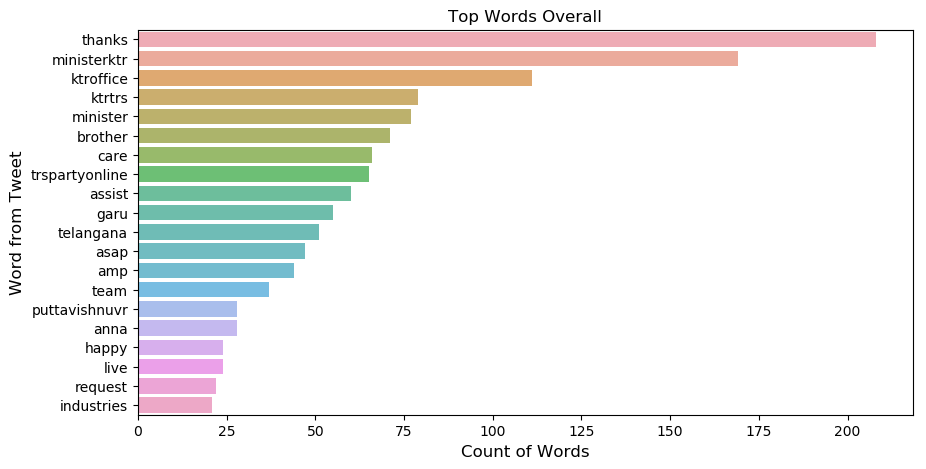

In [20]:

#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df_count = df_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [21]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [22]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [23]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

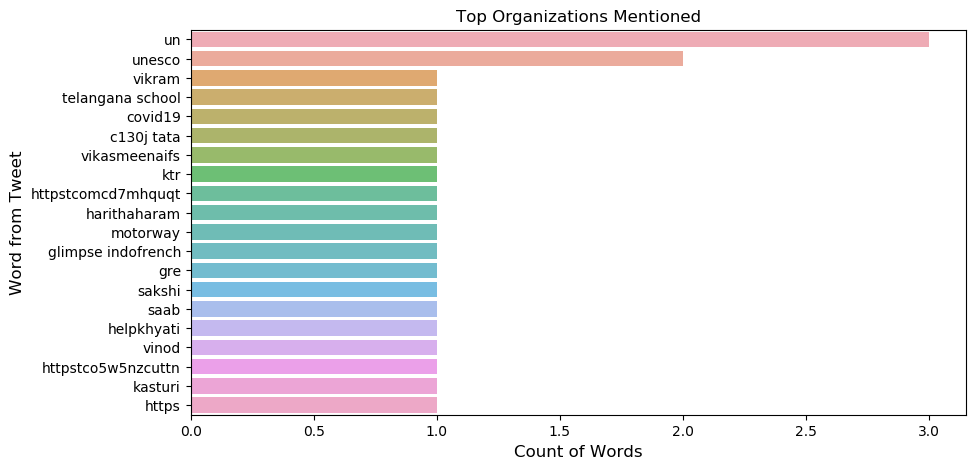

In [24]:
df_count = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [25]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

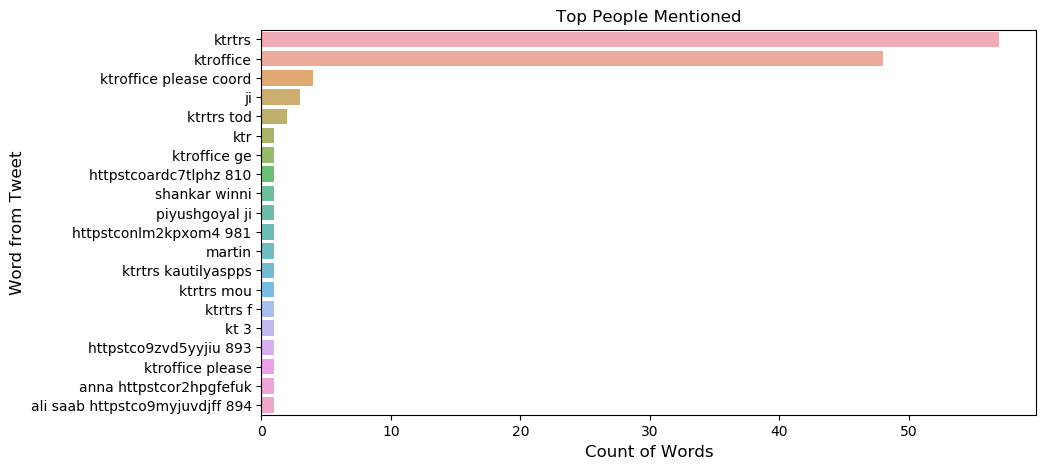

In [26]:
df_count = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [27]:
df_tweet.head()

,Tweet
0,@IndiaembFrance: @KTRTRS-IT&amp;Industries Min...
1,@MinisterKTR: .@byMBDA world leader missile mi...
2,@MinisterKTR: IT &amp; Industries Minister @KT...
3,@MinisterKTR: The Telangana Delegation headed ...
4,@MinisterKTR: ఫ్రాన్స్‌ పర్యటనలో భాగంగా మంత్రి...


In [28]:
df_tweet['polarity'] = df_tweet['Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df_tweet['subjectivity'] = df_tweet['Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [29]:
df_tweet.head()

,Tweet,polarity,subjectivity
0,@IndiaembFrance: @KTRTRS-IT&amp;Industries Min...,0.0,0.0
1,@MinisterKTR: .@byMBDA world leader missile mi...,0.0,0.0
2,@MinisterKTR: IT &amp; Industries Minister @KT...,0.5,0.5
3,@MinisterKTR: The Telangana Delegation headed ...,0.0,0.0
4,@MinisterKTR: ఫ్రాన్స్‌ పర్యటనలో భాగంగా మంత్రి...,0.0,0.0


In [30]:
def getAnalysis(score):
    if score < 0:
        return '‘Negative’'
    elif score == 0:
        return '‘Neutral’'
    else:
        return '‘Positive’'
df_tweet['TextBlob_Analysis'] = df_tweet['polarity'].apply(getAnalysis)

In [31]:
df_tweet.head()

,Tweet,polarity,subjectivity,TextBlob_Analysis
0,@IndiaembFrance: @KTRTRS-IT&amp;Industries Min...,0.0,0.0,‘Neutral’
1,@MinisterKTR: .@byMBDA world leader missile mi...,0.0,0.0,‘Neutral’
2,@MinisterKTR: IT &amp; Industries Minister @KT...,0.5,0.5,‘Positive’
3,@MinisterKTR: The Telangana Delegation headed ...,0.0,0.0,‘Neutral’
4,@MinisterKTR: ఫ్రాన్స్‌ పర్యటనలో భాగంగా మంత్రి...,0.0,0.0,‘Neutral’


In [32]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Tweet                1000 non-null object
polarity             1000 non-null float64
subjectivity         1000 non-null float64
TextBlob_Analysis    1000 non-null object
dtypes: float64(2), object(2)
memory usage: 31.3+ KB


In [33]:
df_tweet_count = df_tweet['TextBlob_Analysis'].value_counts()

In [34]:
df_tweet_count

‘Positive’    484
‘Neutral’     474
‘Negative’     42
Name: TextBlob_Analysis, dtype: int64

In [35]:
df_tweet['polarity'].mean()

0.13963671356421334

In [36]:
df_tweet['subjectivity'].mean()

0.2373427831890313